<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA.
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [12]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [13]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


Using column 'DevType' for industry analysis


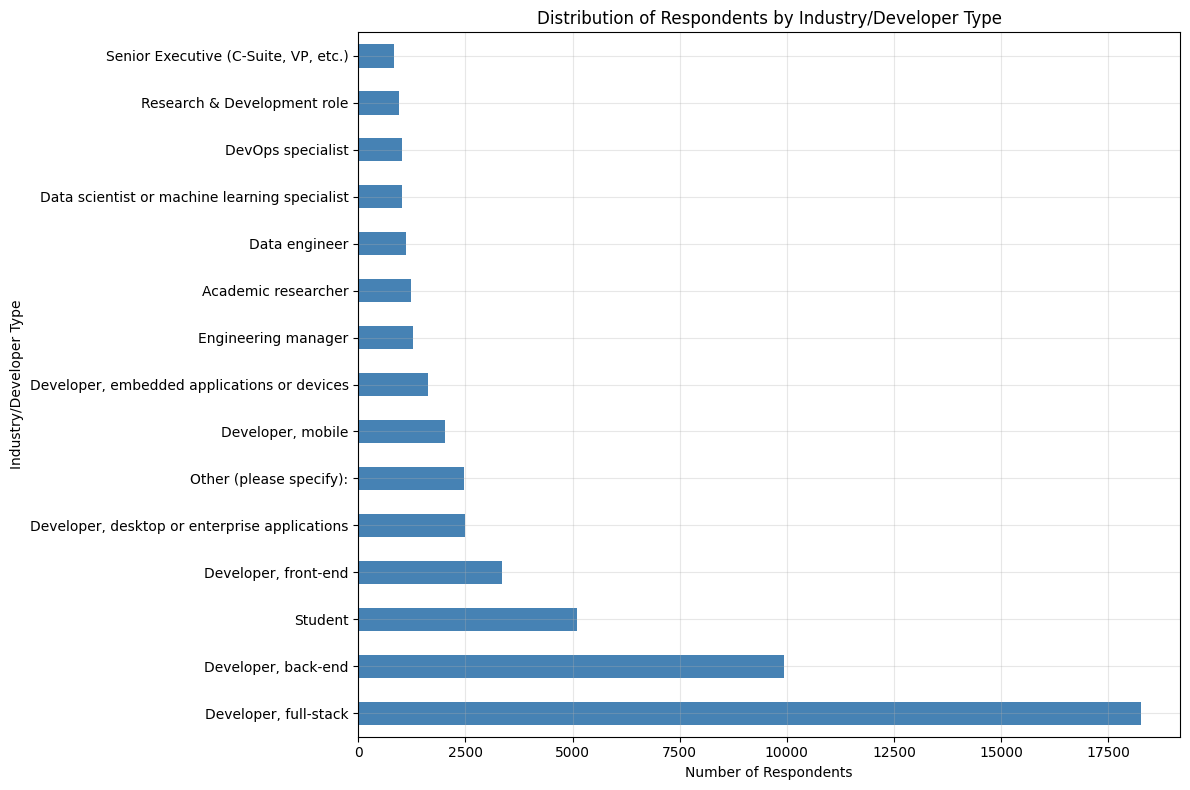

Top Industries/Developer Types:
DevType
Developer, full-stack                            18260
Developer, back-end                               9928
Student                                           5102
Developer, front-end                              3349
Developer, desktop or enterprise applications     2493
Other (please specify):                           2458
Developer, mobile                                 2021
Developer, embedded applications or devices       1623
Engineering manager                               1275
Academic researcher                               1238
Data engineer                                     1118
Data scientist or machine learning specialist     1024
DevOps specialist                                 1019
Research & Development role                        943
Senior Executive (C-Suite, VP, etc.)               837
Name: count, dtype: int64


In [14]:
# Check if 'Industry' column exists, if not use a similar column
industry_column = None
for col in df.columns:
    if 'industry' in col.lower() or 'devtype' in col.lower():
        industry_column = col
        break

if industry_column:
    print(f"Using column '{industry_column}' for industry analysis")

    # Get top industries
    industry_counts = df[industry_column].value_counts().head(15)

    plt.figure(figsize=(12, 8))
    industry_counts.plot(kind='barh', color='steelblue')
    plt.title('Distribution of Respondents by Industry/Developer Type')
    plt.xlabel('Number of Respondents')
    plt.ylabel('Industry/Developer Type')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("Top Industries/Developer Types:")
    print(industry_counts)
else:
    print("No industry-related column found in the dataset")
    # Let's check what columns we have
    print("Available columns:", df.columns.tolist())

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [15]:
# Check if ConvertedCompYearly column exists
if 'ConvertedCompYearly' in df.columns:
    # Basic statistics
    comp_stats = df['ConvertedCompYearly'].describe()
    print("Compensation Statistics:")
    print(comp_stats)

    # Calculate mean, median, and standard deviation
    mean_comp = df['ConvertedCompYearly'].mean()
    median_comp = df['ConvertedCompYearly'].median()
    std_comp = df['ConvertedCompYearly'].std()

    print(f"\nMean compensation: ${mean_comp:,.2f}")
    print(f"Median compensation: ${median_comp:,.2f}")
    print(f"Standard deviation: ${std_comp:,.2f}")

    # Identify outliers using 3 standard deviations
    upper_threshold = mean_comp + (3 * std_comp)
    high_outliers = df[df['ConvertedCompYearly'] > upper_threshold]

    print(f"\nOutlier threshold (3 std dev above mean): ${upper_threshold:,.2f}")
    print(f"Number of high compensation outliers: {len(high_outliers)}")
    print(f"Percentage of outliers: {(len(high_outliers) / len(df)) * 100:.2f}%")

    # Display top outliers
    if len(high_outliers) > 0:
        print("\nTop 10 highest compensations:")
        print(high_outliers[['ConvertedCompYearly']].sort_values('ConvertedCompYearly', ascending=False).head(10))

else:
    print("ConvertedCompYearly column not found in dataset")
    # Check for alternative compensation columns
    comp_columns = [col for col in df.columns if 'comp' in col.lower() or 'salary' in col.lower()]
    print("Available compensation-related columns:", comp_columns)

Compensation Statistics:
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

Mean compensation: $86,155.29
Median compensation: $65,000.00
Standard deviation: $186,756.97

Outlier threshold (3 std dev above mean): $646,426.21
Number of high compensation outliers: 89
Percentage of outliers: 0.14%

Top 10 highest compensations:
       ConvertedCompYearly
15837           16256603.0
12723           13818022.0
28379            9000000.0
17593            6340564.0
17672            4936778.0
19267            3367716.0
23694            2584118.0
33720            2237846.0
34523            2153432.0
13763            2048046.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1 (25th percentile): $32,712.00
Q3 (75th percentile): $107,971.50
IQR: $75,259.50
Lower bound for outliers: $-80,177.25
Upper bound for outliers: $220,860.75
Number of IQR outliers: 978
Percentage of IQR outliers: 1.49%


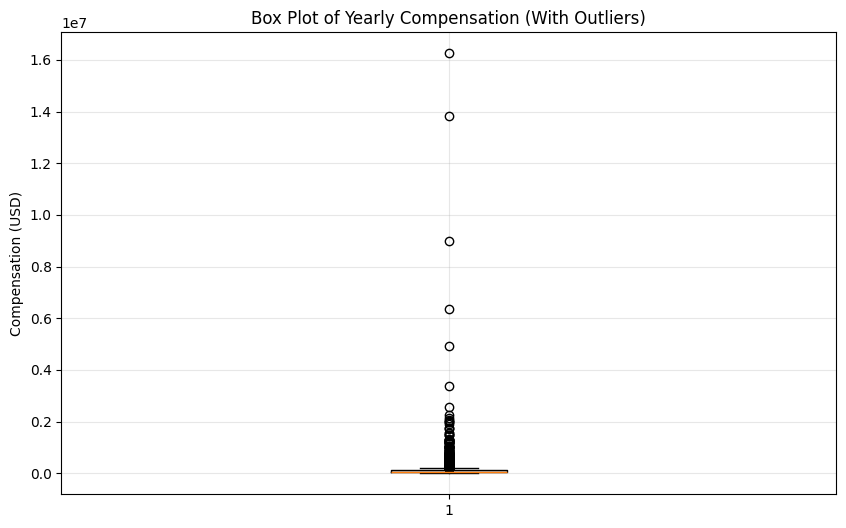

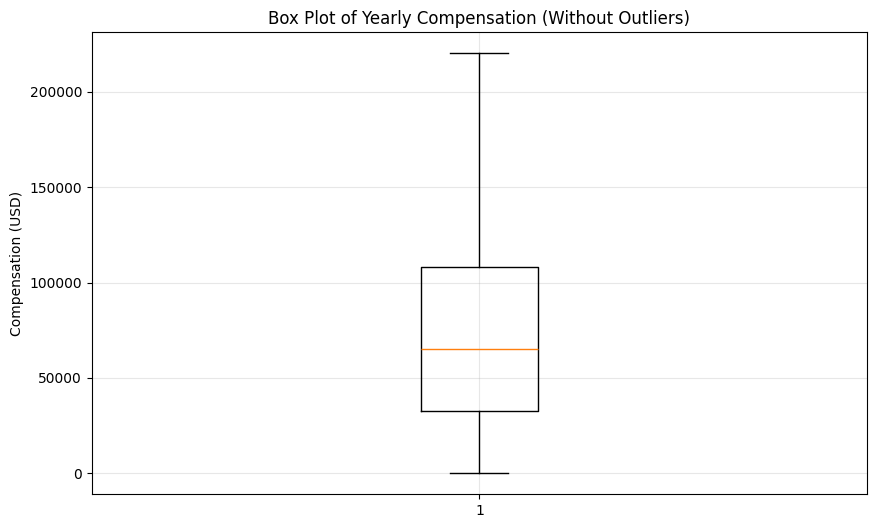

In [16]:
if 'ConvertedCompYearly' in df.columns:
    # Calculate IQR
    Q1 = df['ConvertedCompYearly'].quantile(0.25)
    Q3 = df['ConvertedCompYearly'].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Q1 (25th percentile): ${Q1:,.2f}")
    print(f"Q3 (75th percentile): ${Q3:,.2f}")
    print(f"IQR: ${IQR:,.2f}")
    print(f"Lower bound for outliers: ${lower_bound:,.2f}")
    print(f"Upper bound for outliers: ${upper_bound:,.2f}")

    # Identify outliers
    iqr_outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
    print(f"Number of IQR outliers: {len(iqr_outliers)}")
    print(f"Percentage of IQR outliers: {(len(iqr_outliers) / len(df)) * 100:.2f}%")

    # Visualize with box plot
    plt.figure(figsize=(10, 6))
    plt.boxplot(df['ConvertedCompYearly'].dropna())
    plt.title('Box Plot of Yearly Compensation (With Outliers)')
    plt.ylabel('Compensation (USD)')
    plt.grid(True, alpha=0.3)
    plt.show()

    # Box plot without outliers for better visualization of main distribution
    plt.figure(figsize=(10, 6))
    plt.boxplot(df['ConvertedCompYearly'].dropna(), showfliers=False)
    plt.title('Box Plot of Yearly Compensation (Without Outliers)')
    plt.ylabel('Compensation (USD)')
    plt.grid(True, alpha=0.3)
    plt.show()

else:
    print("ConvertedCompYearly column not available for outlier detection")

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


Original dataset size: 65437
Cleaned dataset size (without outliers): 22457
Number of rows removed: 42980
Percentage of data kept: 34.32%

Compensation Statistics Comparison:
Original - Mean: $86,155.29, Median: $65,000.00
Cleaned  - Mean: $71,347.20, Median: $63,694.00


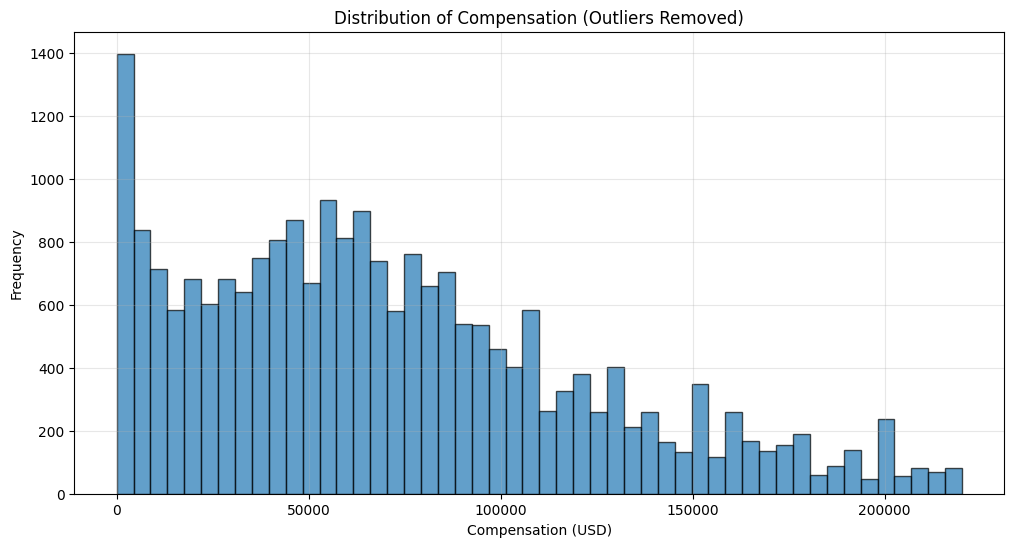

In [17]:
if 'ConvertedCompYearly' in df.columns:
    # Calculate IQR bounds again to be sure
    Q1 = df['ConvertedCompYearly'].quantile(0.25)
    Q3 = df['ConvertedCompYearly'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create new dataframe without outliers
    df_clean = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

    print(f"Original dataset size: {len(df)}")
    print(f"Cleaned dataset size (without outliers): {len(df_clean)}")
    print(f"Number of rows removed: {len(df) - len(df_clean)}")
    print(f"Percentage of data kept: {(len(df_clean) / len(df)) * 100:.2f}%")

    # Compare statistics
    print("\nCompensation Statistics Comparison:")
    print("Original - Mean: ${:,.2f}, Median: ${:,.2f}".format(
        df['ConvertedCompYearly'].mean(), df['ConvertedCompYearly'].median()))
    print("Cleaned  - Mean: ${:,.2f}, Median: ${:,.2f}".format(
        df_clean['ConvertedCompYearly'].mean(), df_clean['ConvertedCompYearly'].median()))

    # Visualize the cleaned distribution
    plt.figure(figsize=(12, 6))
    plt.hist(df_clean['ConvertedCompYearly'].dropna(), bins=50, edgecolor='black', alpha=0.7)
    plt.title('Distribution of Compensation (Outliers Removed)')
    plt.xlabel('Compensation (USD)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()

else:
    print("Cannot remove outliers - ConvertedCompYearly column not found")
    df_clean = df.copy()  # Create a copy as fallback

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


/tmp/ipython-input-3754731883.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age_numeric'] = df_clean['Age'].apply(convert_age_to_numeric)


Correlation Matrix (Top 10 correlations with Age):
Age_numeric            1.000000
WorkExp                0.845127
ConvertedCompYearly    0.369685
JobSat                 0.067167
CompTotal             -0.021381
JobSatPoints_1        -0.038959
ResponseId            -0.040530
JobSatPoints_6        -0.051358
JobSatPoints_8        -0.051506
JobSatPoints_4        -0.069942
Name: Age_numeric, dtype: float64


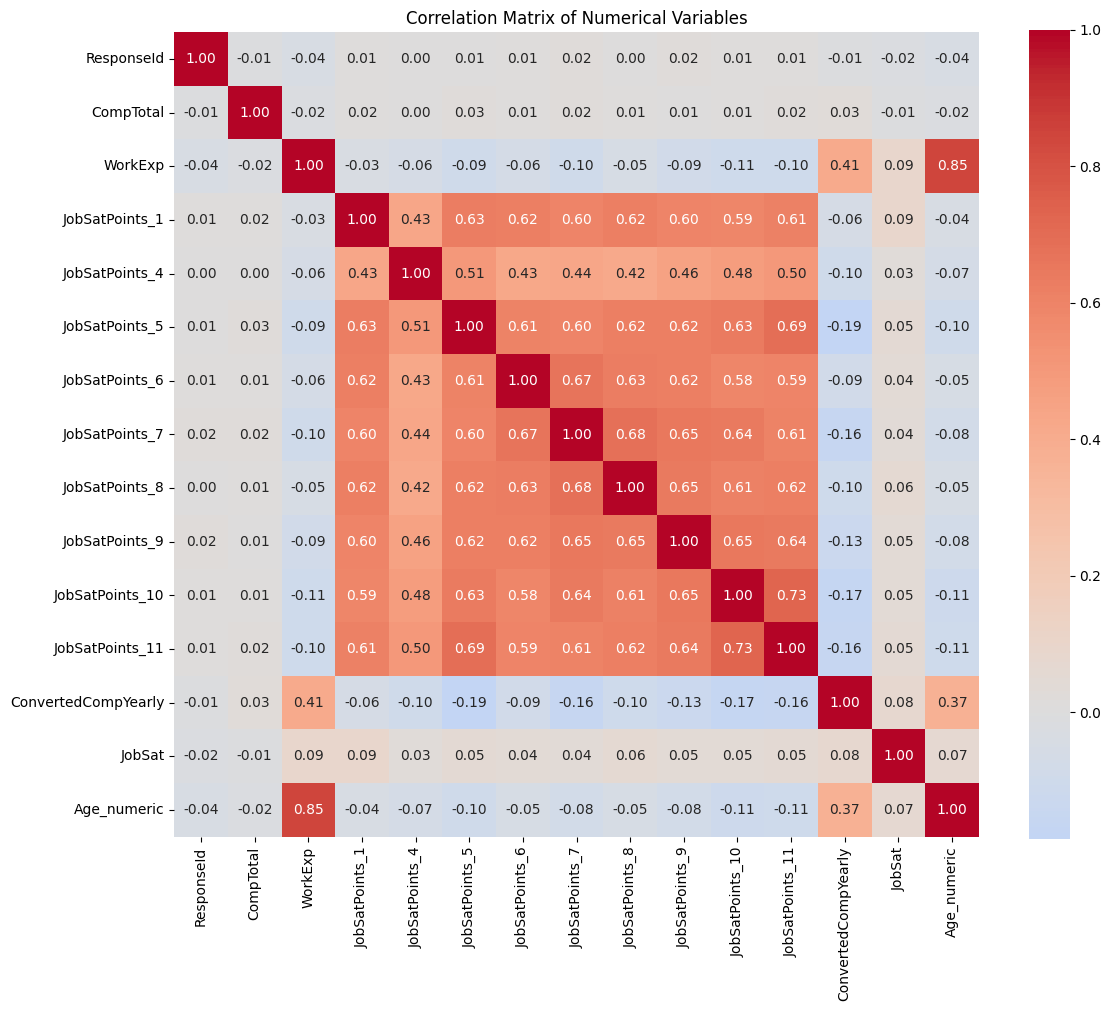

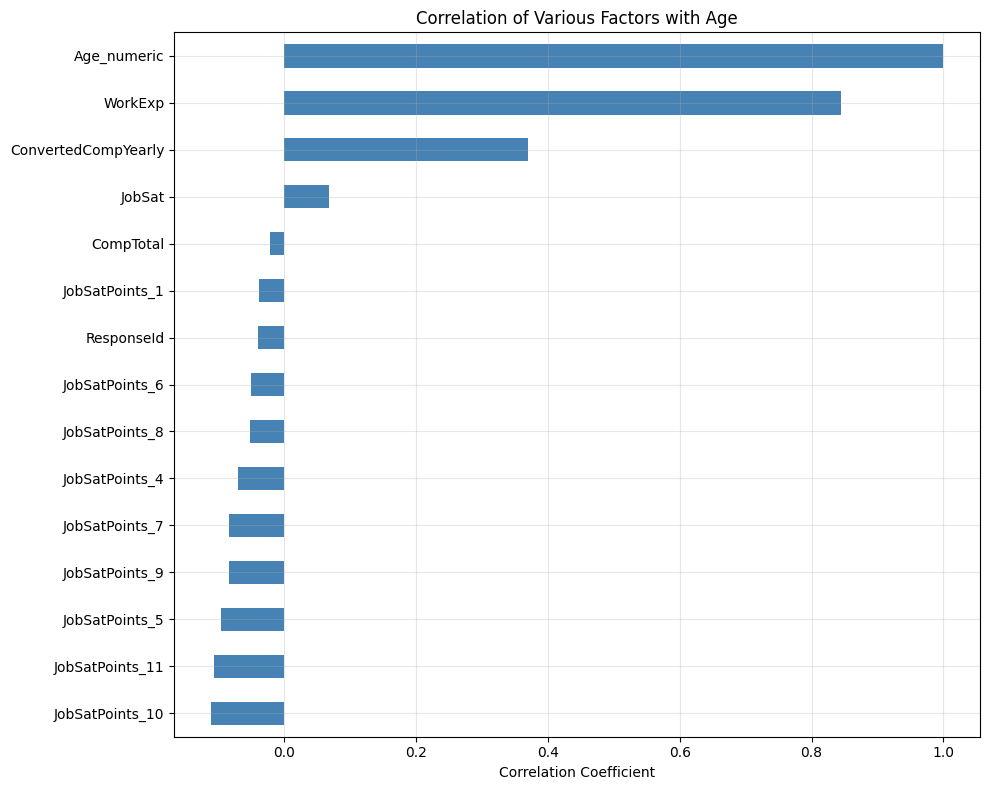

In [19]:
import numpy as np

# Map Age column to approximate numeric values if it exists
if 'Age' in df_clean.columns:
    def convert_age_to_numeric(age_str):
        if pd.isna(age_str):
            return np.nan
        age_mapping = {
            'Under 18 years old': 17,
            '18-24 years old': 21,
            '25-34 years old': 29.5,
            '35-44 years old': 39.5,
            '45-54 years old': 49.5,
            '55-64 years old': 59.5,
            '65 years or older': 70,
            'Unknown': np.nan
        }
        return age_mapping.get(age_str, np.nan)

    df_clean['Age_numeric'] = df_clean['Age'].apply(convert_age_to_numeric)

    # Identify numerical columns for correlation analysis
    numerical_columns = []
    for col in df_clean.columns:
        if pd.api.types.is_numeric_dtype(df_clean[col]) and col != 'Age_numeric':
            numerical_columns.append(col)

    # Add the converted age column
    numerical_columns.append('Age_numeric')

    # Create correlation matrix
    correlation_matrix = df_clean[numerical_columns].corr()

    print("Correlation Matrix (Top 10 correlations with Age):")
    age_correlations = correlation_matrix['Age_numeric'].sort_values(ascending=False)
    print(age_correlations.head(10))

    # Visualize correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True)
    plt.title('Correlation Matrix of Numerical Variables')
    plt.tight_layout()
    plt.show()

    # Focus on correlations with age
    plt.figure(figsize=(10, 8))
    age_correlations_sorted = age_correlations.sort_values()
    age_correlations_sorted.plot(kind='barh', color='steelblue')
    plt.title('Correlation of Various Factors with Age')
    plt.xlabel('Correlation Coefficient')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("Age column not found for correlation analysis")

    # Alternative: show correlation matrix for all numerical columns
    numerical_columns = df_clean.select_dtypes(include=[np.number]).columns.tolist()
    if len(numerical_columns) > 1:
        correlation_matrix = df_clean[numerical_columns].corr()
        print("Correlation Matrix for Numerical Columns:")
        print(correlation_matrix)

        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                    center=0, square=True)
        plt.title('Correlation Matrix of Numerical Variables')
        plt.tight_layout()
        plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
